In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from general_utils.constants import spectral_bands
from pipelines.processing.processing_steps.smoothing import Smooth

df_trees_raw = pd.read_csv("../../data/raw/raw_trainset.csv")
df_trees = df_trees_raw.copy()
df_trees["time"] = pd.to_datetime(df_trees["time"])
df_smooth = Smooth(on=True).run(df_trees)

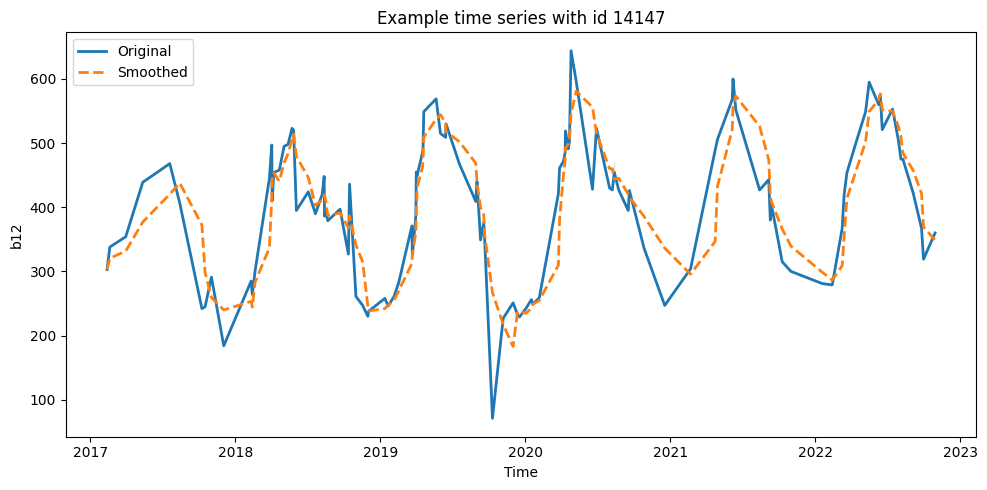

In [14]:
example_id = 14147
df_trees = df_trees[df_trees.id == example_id]
df_smooth = df_smooth[df_smooth.id == example_id]

plt.figure(figsize=(10, 5))
sns.lineplot(x="time", y="b12", data=df_trees, label="Original", linewidth=2)
sns.lineplot(
    x="time", y="b12", data=df_smooth, label="Smoothed", linewidth=2, linestyle="--"
)
plt.title(f"Example time series with id {example_id}")
plt.xlabel("Time")
plt.ylabel("b12")
plt.legend()
plt.tight_layout()
plt.show()

1. Noise Reduction: Time series often include random noise from measurement errors or other unpredictable short-term events. Smoothing techniques, like a moving average or exponential smoothing, act as a low-pass filter to remove these fluctuations and present a cleaner version of the data.

2. Improved Forecasting: Forecasting models can mistakenly try to predict random noise, a problem known as overfitting, which leads to poor performance on new data. By training a model on the smoothed series, we focus on the stable, predictable patterns, which generally results in more robust and reliable forecasts.

3. Anomaly Detection: By observing the difference between the original data and the smoothed line, unusual events or anomalies stand out more clearly. For instance, the sharp dip in the original data around the start of 2020 is highlighted as a significant deviation from the expected pattern shown by the smoothed series, flagging it for further investigation.